In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
historical_index=pd.read_csv('historical_index2.csv')
gender_inequality=pd.read_csv('gender_inequality.csv')
genderin=gender_inequality
genderin = genderin.replace(to_replace = '..', value = '0.1')
gender_inequality = gender_inequality[gender_inequality['Gender Inequality Index (GII)'] != ".."]
gender_development=pd.read_csv('gender_development.csv')
gender_development = gender_development[gender_development['Gender Development Index (GDI)'] != ".."]
human_development=pd.read_csv('human_development.csv')
# historical_index = historical_index.replace(to_replace = '..', value = None)
# historical_index.dropna(axis=0, how='all')
# historical_index=historical_index[historical_index.columns[2::2]]
# historical_index.head()
historical_index.columns=["HDI Rank", "Country", "1990", "2000", "2010", "2011", "2012", "2013", "2014"]
tenyr=historical_index.drop(['2011', '2012','2013','2014'], axis=1)
tenyr= tenyr[tenyr['1990'] != ".."]
oneyr=historical_index.drop(['1990','2000'],axis=1)

In [8]:
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objects as go
#conda install plotly

data = [dict(
        type='choropleth',
        locations= genderin.Country,
        locationmode='country names',
        z=genderin['Gender Inequality Index (GII)'],
        text=gender_inequality.Country,
        colorscale = 'Blues',
        reversescale=True,
        colorbar=dict(autotick=False, tickprefix='', title='GII'),
)]
layout = dict(
            title = 'Gender Inequality',
            geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=30, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)



C:\Users\LAM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[]

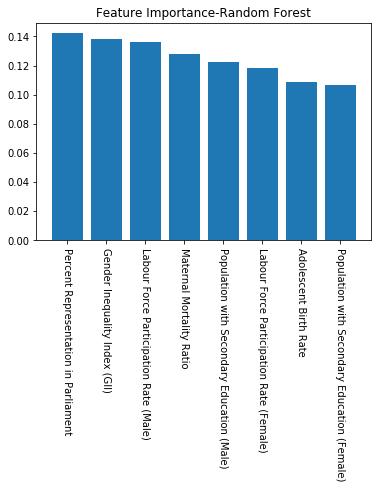

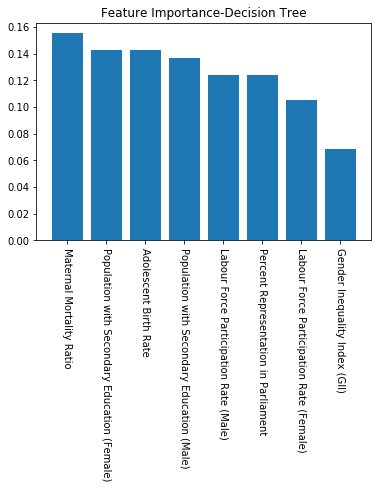

In [9]:
#Random Forest Classifier
X=gender_inequality.drop(['GII Rank','Country'], axis=1)
y=countries=gender_inequality['Country']
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
model = clf.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance-Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()

#Decision Tree Classifier
clf=DecisionTreeClassifier(criterion='gini',random_state=None,presort=False)
model = clf.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance-Decision Tree")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()

                                          Specs         Score
1                      Maternal Mortality Ratio  47005.107200
2                         Adolescent Birth Rate   5610.253675
4  Population with Secondary Education (Female)   2724.962961
5    Population with Secondary Education (Male)   2040.357489
3          Percent Representation in Parliament    978.727624
6      Labour Force Participation Rate (Female)    790.478994
7        Labour Force Participation Rate (Male)    150.838829
0                 Gender Inequality Index (GII)     15.590354
[0.13850932 0.11552795 0.13167702 0.10745342 0.11242236 0.1378882
 0.12670807 0.12981366]


C:\Users\LAM\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



[]

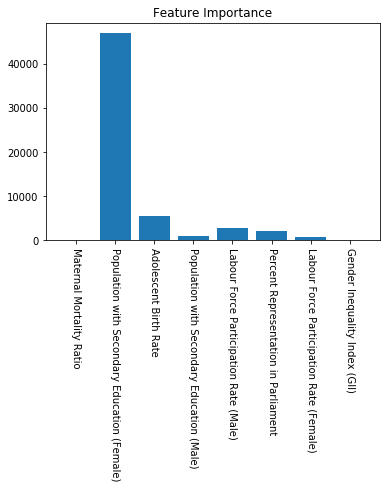

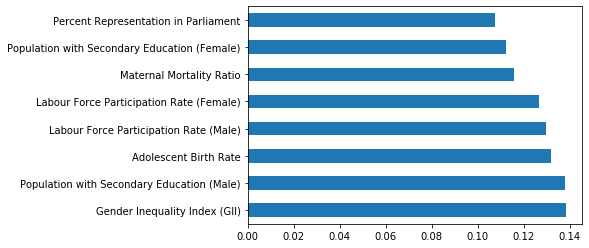

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))
plt.figure()
#plt.subplot(1,2,1)
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), featureScores['Score'])
plt.xticks(range(X.shape[1]), names, rotation=270)
plt.plot()


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#plt.subplot(1,2,2)
plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.plot(rotation=180)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
Gender Inequality Index (GII)                   195 non-null float64
Maternal Mortality Ratio                        195 non-null float64
Adolescent Birth Rate                           195 non-null float64
Percent Representation in Parliament            195 non-null float64
Population with Secondary Education (Female)    195 non-null float64
Population with Secondary Education (Male)      195 non-null float64
Labour Force Participation Rate (Female)        195 non-null float64
Labour Force Participation Rate (Male)          195 non-null float64
dtypes: float64(8)
memory usage: 12.3 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
GII Rank                                        188 non-null float64
Country                                         195 non-null object
Gender Inequality Index (GII)                   195 non-nul

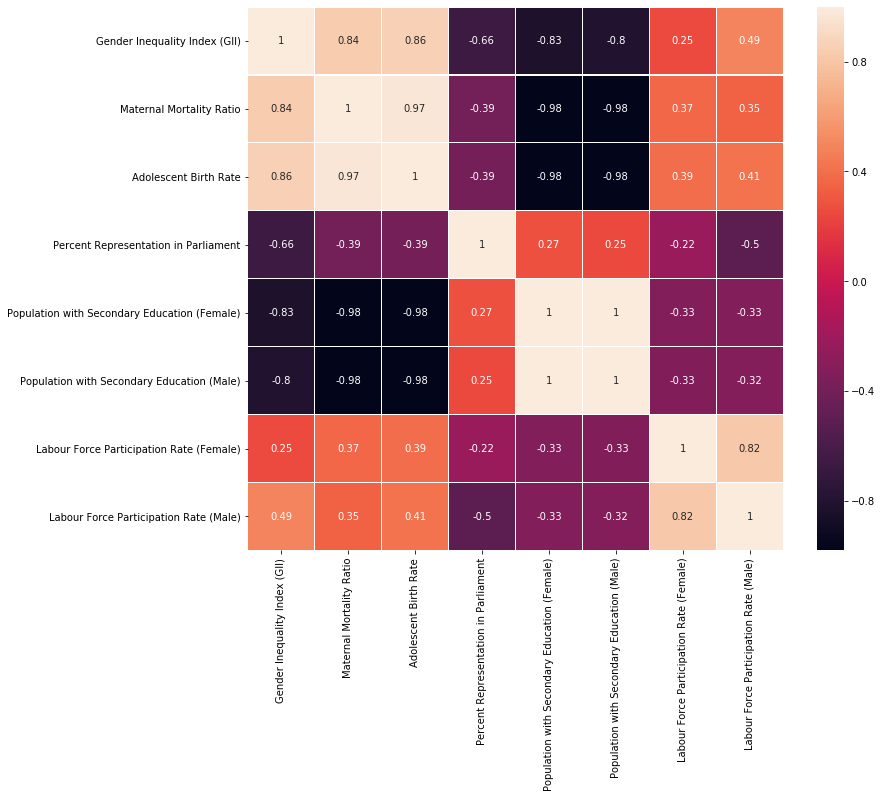

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
X=genderin.drop(['Country','GII Rank'], axis=1)
X = X.astype(float)
X=X.round(2)
X.info()

print('\n')
genderin.info()
plt.figure(figsize=(12,10))
mask=X
X=X.corr()
corr = np.corrcoef(X)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#ax = sns.heatmap(corr, square=True, mask=mask, annot=True, linewidth=0.5)
#mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(), annot=True, linewidth=0.5)
#plot heat map
#g=sns.heatmap(genderin.corr(),annot=True,cmap="RdYlGn")

In [12]:
df=pd.read_csv('2018_Gender_ineq.csv')
df=df.drop(['Unnamed: 7','Unnamed: 5','Unnamed: 3','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17','Unnamed: 19'],axis=1)
df=df.drop([0,1,2,3,4,5,6,160,66],axis=0)
df.columns=["HDI Rank", "Country", "GII", "Rank", "Maternal Mortality Ratio", "Adolescent Birth Rate","Share of Seats In Parliment", "Male Population With Secondary Education","Female Population With Secondary Education", "Male Labor Force Participation","Female Labor Force Participation"]
df.dropna(axis=0, how='all')
df.dropna(axis=1, how='all')
df= df[df['GII'] != ".."]
df.to_csv()
genderinnew=df
#df.iloc[0,0:3]
genderinnew.head()

HDI Rank      Country    GII Rank Maternal Mortality Ratio  \
7         1       Norway  0.048    5                        5   
8         2  Switzerland  0.039    1                        5   
9         3    Australia  0.109   23                        6   
10        4      Ireland  0.109   23                        8   
11        5      Germany  0.072   14                        6   

   Adolescent Birth Rate Share of Seats In Parliment  \
7                    5.6                        41.4   
8                    3.0                        29.3   
9                   12.9                        32.7   
10                   9.7                        24.3   
11                   6.5                        31.5   

   Male Population With Secondary Education  \
7                                      96.3   
8                                      96.4   
9                                      90.0   
10                                     90.2   
11                                     96.2   

   Female Population With Secondary Education Male Labor Force Participation  \
7                                        95.1                           60.8   
8                                        97.2                           62.9   
9                                        89.9                           59.2   
10                                       86.3                           53.0   
11                                       96.8                           55.0   

   Female Labor Force Participation  
7                              67.6  
8                              74.1  
9                              70.5  
10                             67.3  
11                             66.2

In [13]:
df=pd.read_csv('Gender_Inequality_Index.csv')
#tenyr= tenyr.iloc[tenyr[:,1] != ".."]
df=df.drop([0],axis=0)
df=df.drop(['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17','Unnamed: 19','Unnamed: 21','Unnamed: 23'],axis=1)
df.columns=["HDI Rank", "Country", "1995", "2000", "2005", "2010","2011", "2012","2013", "2014","2015","2016","2017"]
df=df.drop(['HDI Rank'], axis=1)
df=df.set_index('Country') 
df = df.replace(to_replace = '..', value = np.nan)
df=df.astype(float)
df=df.T
df.head()

Country  Afghanistan  Albania  Algeria  Argentina  Armenia  Australia  \
1995             NaN      NaN    0.679      0.419    0.474      0.180   
2000             NaN    0.380    0.627      0.411    0.468      0.160   
2005           0.742    0.329    0.561      0.372    0.403      0.139   
2010           0.728    0.273    0.528      0.374    0.344      0.133   
2011           0.717    0.276    0.519      0.368    0.339      0.129   

Country  Austria  Azerbaijan  Bahamas  Bahrain  ...  Solomon Islands  Somalia  \
1995       0.186         NaN      NaN      NaN  ...              NaN      NaN   
2000       0.150         NaN    0.388      NaN  ...              NaN      NaN   
2005       0.118       0.319    0.359    0.325  ...              NaN      NaN   
2010       0.103       0.310    0.378    0.234  ...              NaN      NaN   
2011       0.099       0.311    0.377    0.220  ...              NaN      NaN   

Country  South Sudan  Timor-Leste  Turkmenistan  Tuvalu  Vanuatu  NaN  NaN  \
1995             NaN          NaN           NaN     NaN      NaN  NaN  NaN   
2000             NaN          NaN           NaN     NaN      NaN  NaN  NaN   
2005             NaN          NaN           NaN     NaN      NaN  NaN  NaN   
2010             NaN          NaN           NaN     NaN      NaN  NaN  NaN   
2011             NaN          NaN           NaN     NaN      NaN  NaN  NaN   

Country  NaN  
1995     NaN  
2000     NaN  
2005     NaN  
2010     NaN  
2011     NaN  

[5 rows x 198 columns]

No handles with labels found to put in legend.


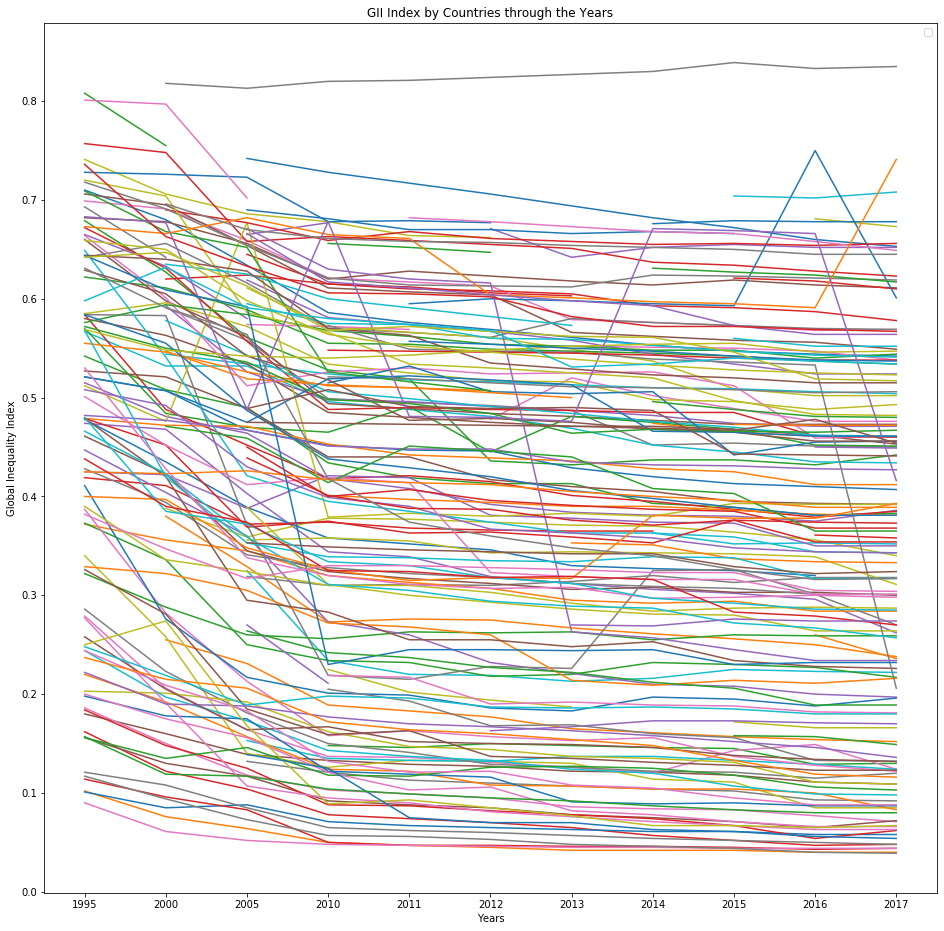

In [14]:
plt.figure(figsize=(16,16))
plt.ylabel('Global Inequality Index')
plt.xlabel('Years')
plt.plot(df)
plt.legend()
plt.title('GII Index by Countries through the Years')
years=["1995", "2000", "2005", "2010","2011", "2012","2013", "2014","2015","2016","2017"]

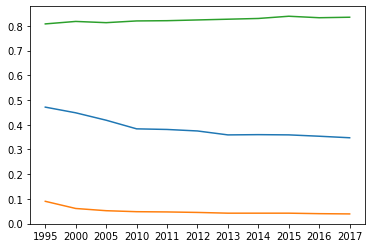

In [15]:
plt.plot(df.mean(axis=1),label='Mean GII')
plt.plot(df.min(axis=1),label='Min GII')
plt.plot(df.max(axis=1),label='Max GII')
# plt.legend()

In [16]:
hdi=pd.read_csv('historical_index.csv')
hdi=hdi.drop(['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11','Unnamed: 13','Unnamed: 15','Unnamed: 17','Unnamed: 19','Unnamed: 21','Unnamed: 23','Unnamed: 25','Unnamed: 27','Unnamed: 29','Unnamed: 31','Unnamed: 33','Unnamed: 35','Unnamed: 37','Unnamed: 39','Unnamed: 41','Unnamed: 43','Unnamed: 45','Unnamed: 47','Unnamed: 49','Unnamed: 51','Unnamed: 53','Unnamed: 55','Unnamed: 57'],axis=1)
#hdi=hdi.T
hdi.head()




Human Development Index (HDI)   Unnamed: 1 Unnamed: 2 Unnamed: 4 Unnamed: 6  \
0               HDI Rank (2017)      Country       1990       1991       1992   
1                           168  Afghanistan         ..         ..         ..   
2                            68      Albania      0.645      0.626       0.61   
3                            85      Algeria      0.577      0.581      0.587   
4                            35      Andorra         ..         ..         ..   

  Unnamed: 8 Unnamed: 10 Unnamed: 12 Unnamed: 14 Unnamed: 16  ... Unnamed: 38  \
0       1993        1994        1995        1996        1997  ...        2008   
1         ..          ..          ..          ..          ..  ...       0.437   
2      0.613       0.619       0.632       0.641       0.641  ...       0.724   
3      0.591       0.595         0.6       0.608       0.617  ...       0.709   
4         ..          ..          ..          ..          ..  ...       0.831   

  Unnamed: 40 Unnamed: 42 Unnamed: 44 Unnamed: 46 Unnamed: 48 Unnamed: 50  \
0        2009        2010        2011        2012        2013        2014   
1       0.453       0.463       0.471       0.482       0.487       0.491   
2       0.729       0.741       0.752       0.767       0.771       0.773   
3       0.719       0.729       0.736        0.74       0.745       0.747   
4        0.83       0.828       0.827       0.849        0.85       0.853   

  Unnamed: 52 Unnamed: 54 Unnamed: 56  
0        2015        2016        2017  
1       0.493       0.494       0.498  
2       0.776       0.782       0.785  
3       0.749       0.753       0.754  
4       0.854       0.856       0.858  

[5 rows x 30 columns]

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import numpy as np

def show_gii_all(fd):  
    df = fd
    plt.figure(figsize=(17,10))
    for x in range(df.shape[0]):
        test = df.iloc[x]
        dates = ['2010','2011','2012','2013','2014',
            '2015','2016','2017']
        values = []
        for year in dates:
            values = values + [test[year]]
        plt.plot(dates,values,color='gray')
            
    test = df.loc['United States']
    values = []
    for year in dates:
        values = values + [test[year]]
    plt.plot(dates,values,color='orange')
    
    minValues = []
    for year in dates:
            minValues=minValues + [np.nanmin(df[year])]
    plt.plot(dates,minValues,color='red')
    
    maxValues = []
    for year in dates:
            maxValues=maxValues + [np.nanmax(df[year])]
    plt.plot(dates,maxValues,color='green')
        
    meanValues = []
    for year in dates:
            meanValues=meanValues + [np.nanmean(df[year])]
    plt.plot(dates,meanValues,color='blue')
    
    plt.grid()
        
    plt.ylim(0, 1)
    
    red_patch = mpatches.Patch(color='red', label='Min GII')
    blue_patch = mpatches.Patch(color='blue', label='Median GII')
    green_patch = mpatches.Patch(color='green', label='Max GII')
    orange_patch = mpatches.Patch(color='orange', label='United States')
    gray_patch = mpatches.Patch(color='gray', label='Other Countries')
    plt.legend(handles=[orange_patch,gray_patch,green_patch,blue_patch,red_patch])
    
    plt.xlabel('Year')
    plt.ylabel('Gender Inequality Index')
    plt.title('Global Gender Inequality Index (2010-2017)') 
    
    plt.show()
    
def show_hdi_all(fd):  
    df = fd
    plt.figure(figsize=(17,10))
    for x in range(df.shape[0]):
        test = df.iloc[x]
        dates = ['1990','1991','1992','1993','1994',
             '1995','1996','1997','1998','1999',
             '2000','2001','2002','2003','2004',
             '2005','2006','2007','2008','2009',
             '2010','2011','2012','2013','2014',
             '2015','2016','2017']
        values = []
        for year in dates:
            values = values + [test[year]]
        plt.plot(dates,values,color='gray')
            
    test = df.loc['United States']
    values = []
    for year in dates:
        values = values + [test[year]]
    plt.plot(dates,values,color='orange')
    
    minValues = []
    for year in dates:
            minValues=minValues + [np.nanmin(df[year])]
    plt.plot(dates,minValues,color='red')
    
    maxValues = []
    for year in dates:
            maxValues=maxValues + [np.nanmax(df[year])]
    plt.plot(dates,maxValues,color='green')
        
    meanValues = []
    for year in dates:
            meanValues=meanValues + [np.nanmedian(df[year])]
    plt.plot(dates,meanValues,color='blue')
    
    plt.grid()
        
    plt.ylim(0, 1)
    
    plt.xlabel('Year')
    plt.ylabel('Human Development Index')
    plt.title('Global Human Development Index (1990-2017)')
    
    red_patch = mpatches.Patch(color='red', label='Min HDI')
    blue_patch = mpatches.Patch(color='blue', label='Median HDI')
    green_patch = mpatches.Patch(color='green', label='Max HDI')
    orange_patch = mpatches.Patch(color='orange', label='United States')
    gray_patch = mpatches.Patch(color='gray', label='Other Countries')
    plt.legend(handles=[orange_patch,gray_patch,green_patch,blue_patch,red_patch])
    
    plt.show()

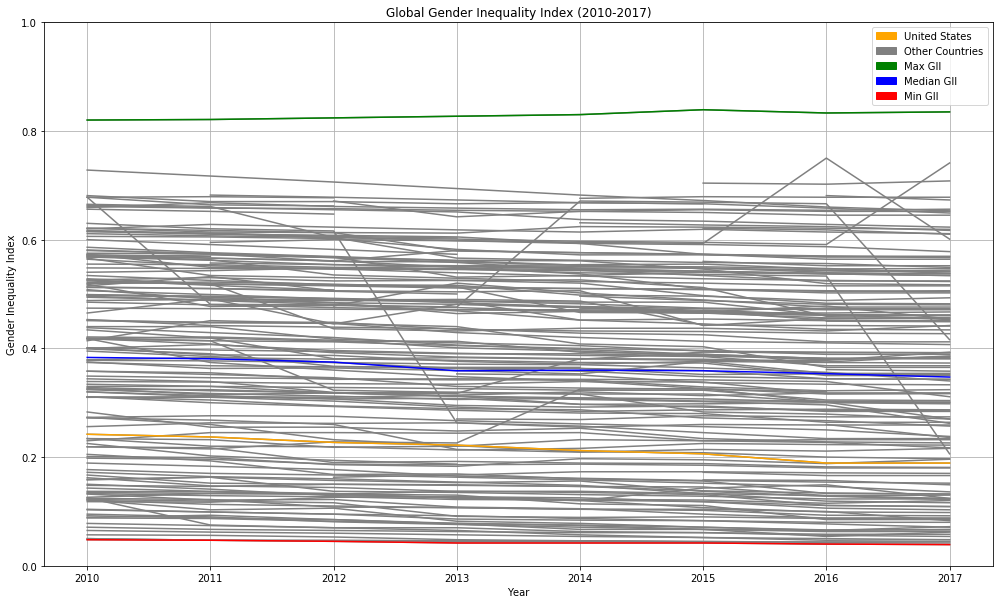

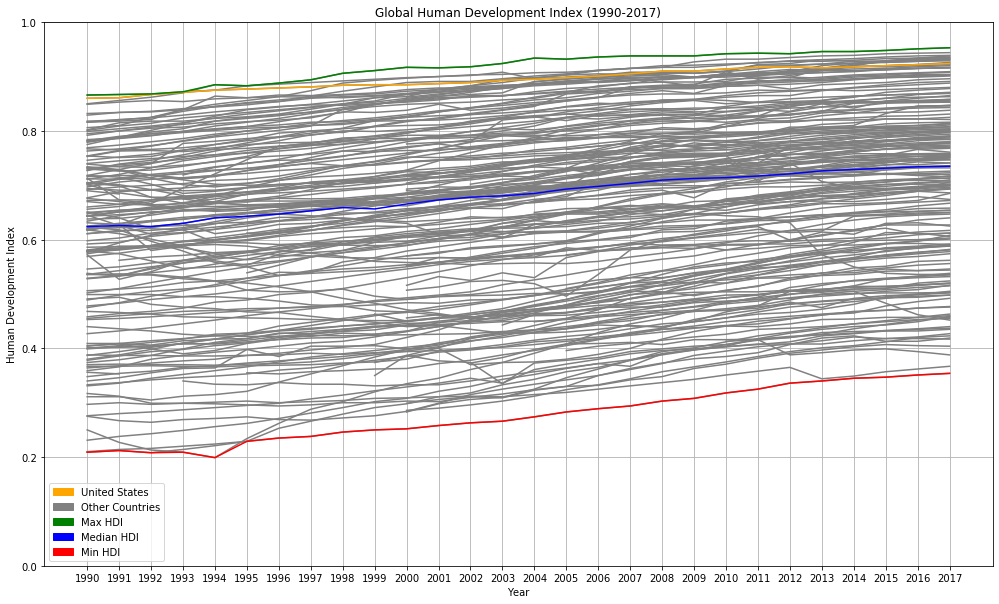

In [3]:
df1 = pd.read_csv('Gender_Inequality_Index.csv', header=1)
df1.set_index('Country',inplace=True)
for x in range(3,23,2):
    df1=df1.drop(['Unnamed: '+str(x)], axis=1)
df1=df1.drop(['HDI Rank (2017)'],axis=1)
df1 = df1.replace(to_replace = '..', value = np.nan)
df1=df1.astype(float)
show_gii_all(df1)

df1 = pd.read_csv('historical_index.csv', header=1)
df1.set_index('Country',inplace=True)
for x in range(3,58,2):
    df1=df1.drop(['Unnamed: '+str(x)], axis=1)
df1=df1.drop(['HDI Rank (2017)'],axis=1)
df1 = df1.replace(to_replace = '..', value = np.nan)
df1=df1.astype(float)
show_hdi_all(df1)